In [7]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt


def molecular_energies(symbols, coordinates, basis_set):
    charge = 0
    multiplicity = 1
    # Generate the molecular Hamiltonian
    hamiltonian = qml.qchem.molecular_hamiltonian(
        symbols = symbols,
        coordinates = coordinates,
        basis=basis_set,
        charge=charge,
        mult=multiplicity
    )[0]

    # Obtain the matrix representation of the Hamiltonian
    ee = qml.eigvals(hamiltonian)
    return np.sort(ee)

# Molecula de $H^2$
En este jupyter vamos a poder a prueba los metodos implementados, aca solo se considerara como base el dimero de hidrogeno.

Primero se probara el VQE, luego el VQD y finalmente se haran un par de pruebas en el VQT.

En el VQE y VQD se probaran los diferentes basis set con diferente numero de dimeros

## VQE: un dimero

### Basis set sto-3g

In [12]:
#symbols = ["H", "H"]
#coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614], requires_grad=True)
symbols = ["He", "He", "He"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 3, 0.0, 0.0, -3], requires_grad=True)

#Parametros del hamiltoniano molecular
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    #'basis': '6-31g',
    'method': 'dhf'
}

#Construccion de la clase
molecule = vqe_molecular(symbols, coordinates, params)
molecule.set_group_characteristics()

In [14]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
    "pattern": "chain"
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )

rep = molecule.qubits*ansatz_params["repetitions"]

In [17]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "step_theta":0.3,
    "step_x":0.7,
    "number": molecule.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
#optimizer.set_constrains()

energy, optimum = optimizer.VQE(molecule.cost_function, molecule.qubits)

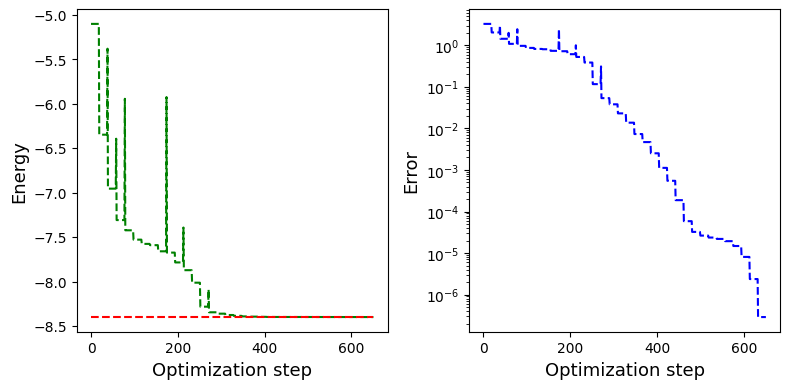

In [18]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

## VQE: Dos dimeros

In [6]:
symbols = ["H", "H", "H", "H"]
coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614, 0.0, 2.0, -0.6614, 0.0, 2.0, 0.6614], requires_grad=True)

#Parametros del hamiltoniano molecular
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf'
}

#Construccion de la clase
molecule = vqe_molecular(symbols, coordinates, params)
molecule.set_group_characteristics()

In [7]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "pattern": "chain",
    "backend": None,
    "interface": "autograd",
    "shots": 1000,
    "token": None,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )

rep = molecule.qubits*ansatz_params["repetitions"]

In [ ]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 200,
    "tol": 0.000001,
    "number": molecule.qubits*ansatz_params["repetitions"]}

optimizer = scipy_optimizer(minimizate_params)
#optimizer.set_constrains()

energy, optimum = optimizer.VQE(molecule.cost_function, molecule.qubits)

Traceback (most recent call last):
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
  File "/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/scipy/optimize/_cobyla_py.py", line 258, in calcfc
    f = fun(np.copy(x), *args)
  File "/Users/jnorambu/Documents/vqesimulation/demos/../quantumsim/optimizers/scipy_opt.py", line 72, in cost_aux
    theta_evol.append(x)
  File "/Users/jnorambu/Documents/vqesimulation/demos/../quantumsim/variational/variational_quantum_eigensolver.py", line 87, in cost_function
    result_probs = self.node(theta = theta, obs = group, characteristic=self.groups_caractericts[i], state= state)
  File "/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/qnode.py", line 950, in __call__
    res = qml.execute(
  File "/Users/jnorambu/Documents/vqesimul

: 

: 

In [9]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])

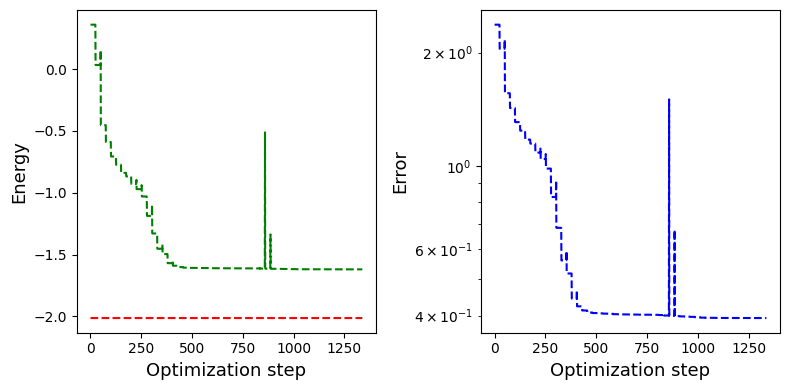

In [10]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

## VQE: Tres dimeros

In [17]:
symbols = ["H", "H", "H", "H", "H", "H"]
coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614, 
        0.0, 1.0, -0.6614, 0.0, 1.0, 0.6614,
        0.0, 2.0, -0.6614, 0.0, 2.0, 0.6614], requires_grad=True)

#Parametros del hamiltoniano molecular
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf'
}

#Construccion de la clase
molecule = vqe_molecular(symbols, coordinates, params)
molecule.set_group_characteristics()

In [18]:
ansatz_params = {
    "repetitions": 2,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 2**10,
    "token": None,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )

rep = molecule.qubits*ansatz_params["repetitions"]

In [19]:
minimizate_params = {
    "maxiter": 100,
    "tol": 0.000001,
    "step_theta":0.4,
    "step_x":0.8,
    "number": molecule.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = gradiend_optimizer(minimizate_params)
#optimizer.set_constrains()

energy, optimum = optimizer.VQE(molecule.cost_function, molecule.qubits)

[1 1 1 1 1 1 0 0 0 0 0 0]


KeyboardInterrupt: 

In [ ]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

fig.suptitle('Ground state of a spin chain', fontsize=12)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

## VQE: Cuatro dimeros

In [9]:
symbols4 = ["H", "H", "H", "H", "H", "H", "H", "H"]
coordinates4 = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614, 
        0.0, 1.0, -0.6614, 0.0, 1.0, 0.6614,
        0.0, 2.0, -0.6614, 0.0, 2.0, 0.6614,
        0.0, 3.0, -0.6614, 0.0, 3.0, 0.6614], requires_grad=True)


#Parametros del hamiltoniano molecular
params4 = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf'
}

#Construccion de la clase
molecule4 = vqe_molecular(symbols4, coordinates4, params4)
molecule4.set_group_characteristics()

In [11]:
ee = molecular_energies(symbols=symbols4, coordinates=coordinates4, basis_set=params4["basis"])

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/ops/functions/eigvals.py:108: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


: 

: 

In [ ]:
ansatz_params = {
    "repetitions": 2,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )

rep = molecule.qubits*ansatz_params["repetitions"]